In [ ]:
#data was obtained from city of austin data portal
#https://data.austintexas.gov/Transportation-and-Mobility/Real-Time-Traffic-Incident-Reports/dx9v-zd7x/data_preview

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
atx_traffic = pd.read_csv('/Users/eugeniaportillo/Desktop/Python Projects/Analyze ATX Traffic Data/ATX_Traffic_Incident_Reports_20250805.csv', low_memory=False)

In [4]:
#returning total count of rows & columns
atx_traffic.shape #returning the numbers of rows & columns

(432518, 10)

In [5]:
atx_traffic.info

<bound method DataFrame.info of                                         Traffic Report ID  \
0       F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...   
1       042338D46C2028808F298DEC735DC7ADF0C162F6_17096...   
2       BE73E73B642ECB6C6EDB4A52875A8017F69DFE5E_17080...   
3       A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...   
4       4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...   
...                                                   ...   
432513  E6E50CC4CC91E09DEDDF941F21B397FCE5ED58BD_17544...   
432514  D9BC87DD9580C87C7378651D4235E297EBB962ED_17544...   
432515  741C07500DE9571F0267456ADC47830465E658E9_17544...   
432516  D7B61E11A946B8C39537D7457BCBB7B1493F13A7_17544...   
432517  2314A350E505EC7C79579F94AD8C46B42631A2E8_17544...   

                      Published Date     Issue Reported  \
0       03/06/2024 01:29:39 AM +0000    Stalled Vehicle   
1       03/06/2024 01:26:42 AM +0000       Crash Urgent   
2       02/15/2024 10:17:48 PM +0000    LOOSE LIVESTOCK   

In [6]:
#previewing data > returning the first 5 rows
atx_traffic.head()

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency
0,F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...,03/06/2024 01:29:39 AM +0000,Stalled Vehicle,POINT (-97.705874 30.32358),30.323580,-97.705874,E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...,ARCHIVED,03/06/2024 02:10:12 AM +0000,AUSTIN PD
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,03/06/2024 01:26:42 AM +0000,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD
2,BE73E73B642ECB6C6EDB4A52875A8017F69DFE5E_17080...,02/15/2024 10:17:48 PM +0000,LOOSE LIVESTOCK,POINT (-97.717911 30.0578),30.057800,-97.717911,12400 Glass Rd,ARCHIVED,02/15/2024 11:33:08 PM +0000,TRAVIS COUNTY SHERIF
3,A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...,04/10/2020 09:31:11 PM +0000,TRFC HAZD/ DEBRIS,POINT (-97.866676 30.140878),30.140878,-97.866676,S Sh 45 W Eb & S Sh 45 W Eb To Bliss Spillar Ramp,ARCHIVED,04/10/2020 09:55:03 PM +0000,NaN
4,4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...,06/04/2022 05:51:05 PM +0000,Traffic Hazard,POINT (-97.825791 30.455444),30.455444,-97.825791,Anderson Mill Rd & N Fm 620 Rd,ARCHIVED,06/04/2022 06:20:03 PM +0000,NaN


In [7]:
atx_traffic.dtypes #understanding data types

Traffic Report ID     object
Published Date        object
Issue Reported        object
Location              object
Latitude             float64
Longitude            float64
Address               object
Status                object
Status Date           object
Agency                object
dtype: object

In [8]:
#extracting different classifications for issues reported
unique_categories = atx_traffic['Issue Reported'].unique()
print(unique_categories)

['Stalled Vehicle' 'Crash Urgent' 'LOOSE LIVESTOCK' 'TRFC HAZD/ DEBRIS'
 'Traffic Hazard' 'COLLISION' 'COLLISION/PRIVATE PROPERTY'
 'FLEET ACC/ INJURY' 'Crash Service' 'COLLISION WITH INJURY'
 'COLLISN/ LVNG SCN' 'zSTALLED VEHICLE' 'BOAT ACCIDENT' 'VEHICLE FIRE'
 'BLOCKED DRIV/ HWY' 'TRAFFIC FATALITY' 'AUTO/ PED' 'Traffic Impediment'
 'N / HZRD TRFC VIOL' 'ICY ROADWAY' 'COLLISN / FTSRA' 'FLEET ACC/ FATAL'
 'OBSTRUCT HWY' 'HIGH WATER']


In [9]:
# Calculate counts of each issue reported
issue_counts = atx_traffic['Issue Reported'].value_counts()
print(issue_counts)

Issue Reported
Traffic Hazard                127794
Crash Urgent                  105553
Crash Service                  59228
COLLISION                      44911
TRFC HAZD/ DEBRIS              33391
LOOSE LIVESTOCK                11603
COLLISION WITH INJURY          11433
Stalled Vehicle                 9465
zSTALLED VEHICLE                8930
COLLISN/ LVNG SCN               8710
Traffic Impediment              6255
COLLISION/PRIVATE PROPERTY      1913
VEHICLE FIRE                    1740
BLOCKED DRIV/ HWY                964
AUTO/ PED                        186
BOAT ACCIDENT                    136
TRAFFIC FATALITY                 129
ICY ROADWAY                       78
FLEET ACC/ INJURY                 61
OBSTRUCT HWY                      15
N / HZRD TRFC VIOL                13
HIGH WATER                         6
FLEET ACC/ FATAL                   3
COLLISN / FTSRA                    1
Name: count, dtype: int64


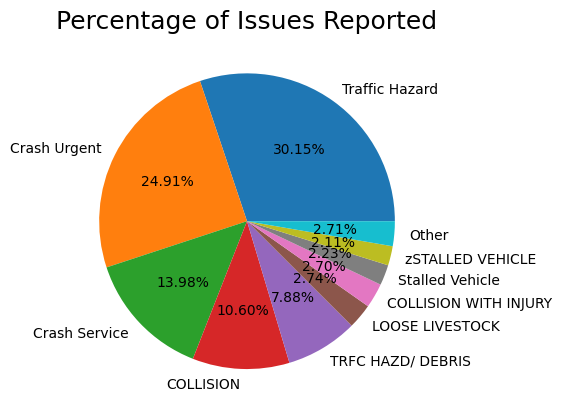

In [10]:
#visualize percentage of issues reported
plt.figure()
x=atx_traffic['Issue Reported'].value_counts()[0:9] #limiting the first 17 values (they have a a higher than 100 occurence count)
other_sum = sum(atx_traffic['Issue Reported'].value_counts()[10:]) #summing remaining values
x.at['Other']=other_sum #adding new key value 
labels=x.index
plt.pie(x,labels=labels, autopct='%.02f%%')
plt.title('Percentage of Issues Reported', fontsize=18)
plt.show()

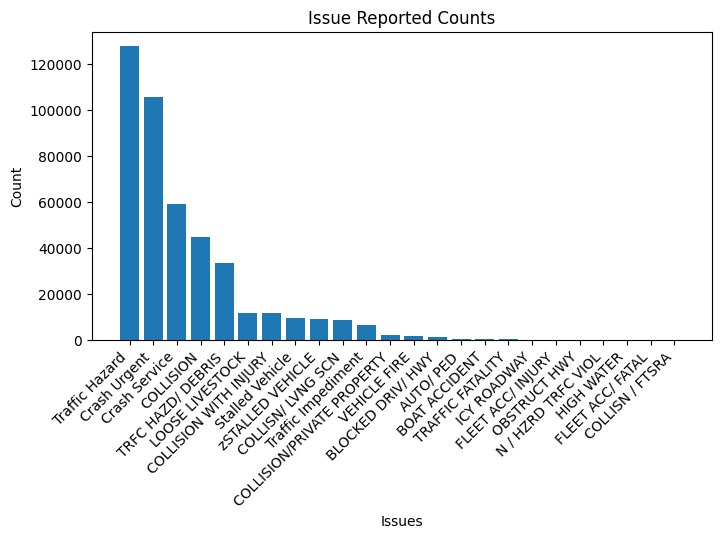

In [11]:
# Bar chart to visualize issue counts
plt.figure(figsize=(8, 4))
plt.bar(issue_counts.index, issue_counts)
plt.title('Issue Reported Counts')
plt.xlabel('Issues')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.show()

In [12]:
#extracting & filtering from the datetime column
# Convert 'Date' column to datetime objects
atx_traffic['Published Date'] = pd.to_datetime(atx_traffic['Published Date'])

In [13]:
# Extract the year into a new 'Year' column
atx_traffic['Published Date'] = atx_traffic['Published Date'].dt.year

In [14]:
# Print data for a specific year (e.g., 2021)
atx_traffic_2025 = atx_traffic[atx_traffic['Published Date'] == 2025]
print("\nData for the year 2025 (extracted from datetime):")
print(atx_traffic_2025)


Data for the year 2025 (extracted from datetime):
                                        Traffic Report ID  Published Date  \
107786  4D027DAD69409A84F289016DAC695616B78DDE20_17381...            2025   
116052  43EF78BF952F4756309200BB44EF9C7912C75037_17383...            2025   
132343  B4A28DDBAE199FA52875D0AE24FCC43DA1506407_17360...            2025   
135453  434F87C79F3D0B34DC659B9009F34134552BCC22_17381...            2025   
141489  0DCEDD9FF2B9E09E7BF85EEEC8CA731A3D606372_17381...            2025   
...                                                   ...             ...   
432513  E6E50CC4CC91E09DEDDF941F21B397FCE5ED58BD_17544...            2025   
432514  D9BC87DD9580C87C7378651D4235E297EBB962ED_17544...            2025   
432515  741C07500DE9571F0267456ADC47830465E658E9_17544...            2025   
432516  D7B61E11A946B8C39537D7457BCBB7B1493F13A7_17544...            2025   
432517  2314A350E505EC7C79579F94AD8C46B42631A2E8_17544...            2025   

        Issue Reported  

In [30]:
# Calculate counts of issue reported based on year
yearly_issue_counts = atx_traffic['Published Date'].value_counts()
print (yearly_issue_counts)

Published Date
2018    70070
2019    68051
2022    53109
2021    51338
2023    51109
2024    48285
2020    45321
2025    28041
2017    17194
Name: count, dtype: int64


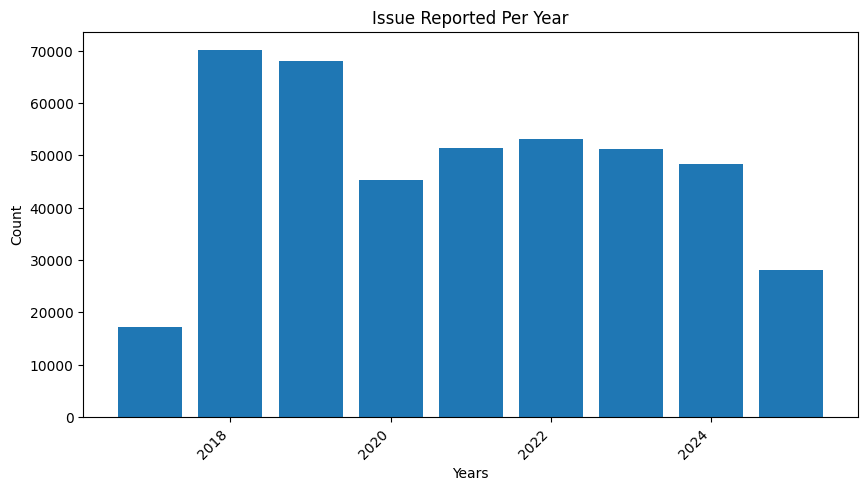

In [18]:
# Bar chart to visualize issue counts
plt.figure(figsize=(10, 5))
plt.bar(yearly_issue_counts.index, yearly_issue_counts)
plt.title('Issue Reported Per Year')
plt.xlabel('Years')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.show()

In [13]:
'''import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

#plotting in a map the location of accidents
m_1 = folium.Map(location=[30.2672, -97.7431], tiles='openstreetmap', zoom_start=10)

m_1 = folium.Map(location=[30.2672, -97.7431], tiles='openstreetmap', zoom_start=10)

# Plotting Function
def plotDot(point):
    folium.CircleMarker(location=[point['Latitude'],point['Longitude']], radius=2, weight=5).add_to(m_1)

data_clean = atx_traffic.dropna()
for idx, row in data_clean.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']]).add_to(m_1)

m_1'''

#able to load this map with the accident location in jupyter notebook
#but not able to load once file is uploaded into github (file size too big)

"import folium\nfrom folium import Choropleth, Circle, Marker\nfrom folium.plugins import HeatMap, MarkerCluster\n\n#plotting in a map the location of accidents\nm_1 = folium.Map(location=[30.2672, -97.7431], tiles='openstreetmap', zoom_start=10)\n\nm_1 = folium.Map(location=[30.2672, -97.7431], tiles='openstreetmap', zoom_start=10)\n\n# Plotting Function\ndef plotDot(point):\n    folium.CircleMarker(location=[point['Latitude'],point['Longitude']], radius=2, weight=5).add_to(m_1)\n\ndata_clean = atx_traffic.dropna()\nfor idx, row in data_clean.iterrows():\n    folium.CircleMarker([row['Latitude'], row['Longitude']]).add_to(m_1)\n\nm_1"